In [70]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import applications

In [71]:
# Définir les chemins vers les répertoires de données
train_dir = '../tp1/data/TRAIN'
test_dir = '../tp1/data/TEST'
val_dir = '../tp1/data/VAL'


In [72]:
# Créer des générateurs d'images pour l'entraînement et le test
train_datagen = ImageDataGenerator(rescale=1./255, # normalisation
                                   rotation_range=10, # 10 est le degré de rotation
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True, # flip est comme un effet miroir
                                   fill_mode='nearest') # nearest est la méthode d'interpolation

Val_datagen = ImageDataGenerator(rescale=1./255) # juste la normalisation

train_generator = train_datagen.flow_from_directory(  #application du générateur sur la base initiale
    train_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical')

# Charger les images de test
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [73]:
# Vérifiez la distribution des classes dans vos données
train_class_counts = train_generator.classes
val_class_counts = validation_generator.classes

print("Distribution des classes dans les données d'entraînement :", np.bincount(train_class_counts))
print("Distribution des classes dans les données de validation :", np.bincount(val_class_counts))

Distribution des classes dans les données d'entraînement : [20 19]
Distribution des classes dans les données de validation : [5 5]


In [74]:
# Configurer le modèle VGG19 pour le Transfer Learning
img_width,img_height=224,224 
base_model = applications.VGG19(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3)) 

top_model = Sequential() 
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:],data_format=None)) 
top_model.add(Dense(1024,activation='relu')) 
top_model.add(Dropout(0.25)) 
top_model.add(Dense(256,activation='sigmoid')) 
top_model.add(Dense(2, activation='softmax'))
model=Model(inputs=base_model.input,outputs=top_model(base_model.output))

# Afficher le résumé du modèle
model.summary()

c:\Python311\Lib\site-packages\keras\src\layers\pooling\base_global_pooling.py:12: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (None, 2)              │       788,226 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,812,610 (79.39 MB)

 Trainable params: 20,812,610 (79.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 407ms/step - accuracy: 0.5199 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.8088 - learning_rate: 1.0000e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - accuracy: 0.5489 - loss: 1.0569 - val_accuracy: 0.5000 - val_loss: 0.7111 - learning_rate: 1.0000e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.4550 - loss: 0.7345 - val_accuracy: 0.5000 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 399ms/step - accuracy: 0.4052 - loss: 0.7000 - val_accuracy: 0.5000 - val_loss: 0.6947 - learning_rate: 1.0000e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.4440 - loss: 0.7163 - val_accuracy: 0.5000 - val_loss: 0.6912 - learning_rate: 1.0000e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - accuracy: 0.4585 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6960 - learning_rate: 1.0000e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - ac

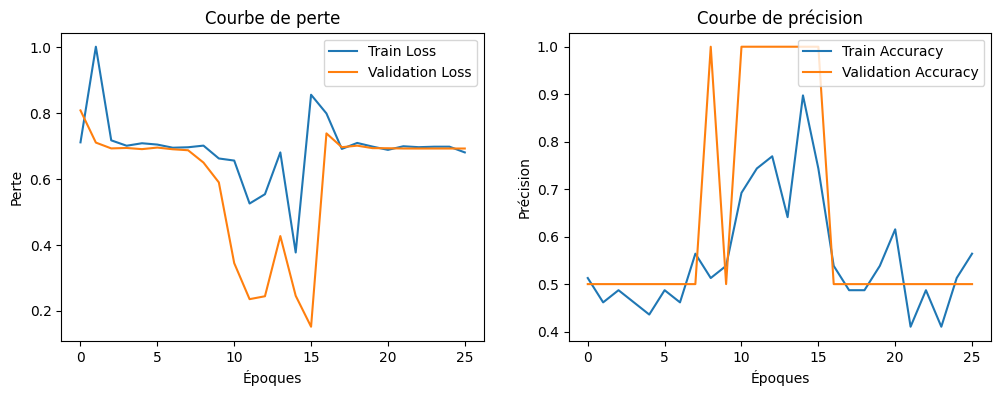

In [78]:
from sklearn.utils.class_weight import compute_class_weight

# Compiler et entraîner le modèle
early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001, patience=4, verbose=1, factor=0.2)
callbacks_list = [early, learning_rate_reduction]

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_class_counts), y=train_class_counts)
class_weights = dict(enumerate(class_weights))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle sur le dataset COVID-19
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=callbacks_list
)

# Évaluer le modèle sur le dataset de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Afficher les courbes de perte et de précision
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.show()

In [79]:
import pandas as pd
import os
# Extraire les données de l'historique
epochs = history.epoch
train_losses = history.history['loss']
val_losses = history.history['val_loss']
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

# Créer un dictionnaire avec les données
data = {
    'epoch': epochs,
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_accuracy': train_accuracies,
    'val_accuracy': val_accuracies
}

# Convertir le dictionnaire en DataFrame
df = pd.DataFrame(data)

if not os.path.exists('../resultats'):
    os.makedirs('../resultats')

# Écrire le DataFrame dans un fichier CSV
df.to_csv('../resultats/resultats_VGG19.csv', index=False)

print("Les résultats ont été écrits dans le fichier resultats.csv")

Les résultats ont été écrits dans le fichier resultats.csv
